Fitted parameters:
a = 0.9910959272866223, b = 0.2196735117542633, sigma = 2.0154675380773175, c = 0.5275348240558507
Standard deviation (sigma) = 2.0154675380773175 ± 0.09973536869064649


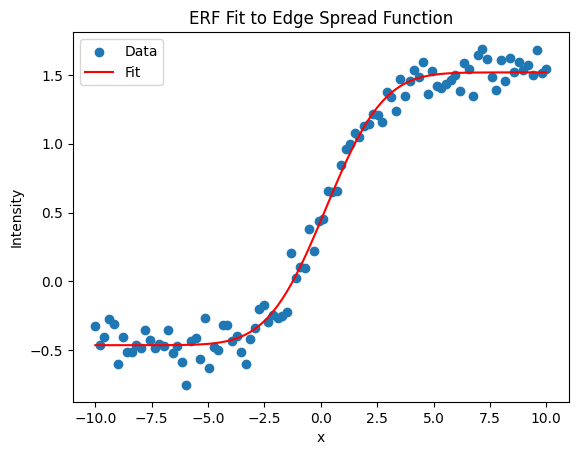

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
import matplotlib.pyplot as plt

# Define the ERF model
def erf_model(x, a, b, sigma, c):
    return a * erf((x - b) / (np.sqrt(2) * sigma)) + c

# Generate some synthetic data for demonstration (replace with your data)
np.random.seed(0)
x = np.linspace(-10, 10, 100)
true_sigma = 2.0
y = 1.0 * erf((x - 0.0) / (np.sqrt(2) * true_sigma)) + 0.5 + 0.1 * np.random.normal(size=x.size)

# Fit the model to the data
popt, pcov = curve_fit(erf_model, x, y, p0=[1.0, 0.0, 1.0, 0.5])

# Extract fitted parameters
a_fit, b_fit, sigma_fit, c_fit = popt
sigma_std_error = np.sqrt(pcov[2, 2])  # Standard error of sigma

print(f"Fitted parameters:")
print(f"a = {a_fit}, b = {b_fit}, sigma = {sigma_fit}, c = {c_fit}")
print(f"Standard deviation (sigma) = {sigma_fit} ± {sigma_std_error}")

# Plot the data and the fit
plt.scatter(x, y, label="Data")
plt.plot(x, erf_model(x, *popt), color="red", label="Fit")
plt.legend()
plt.xlabel("x")
plt.ylabel("Intensity")
plt.title("ERF Fit to Edge Spread Function")
plt.show()


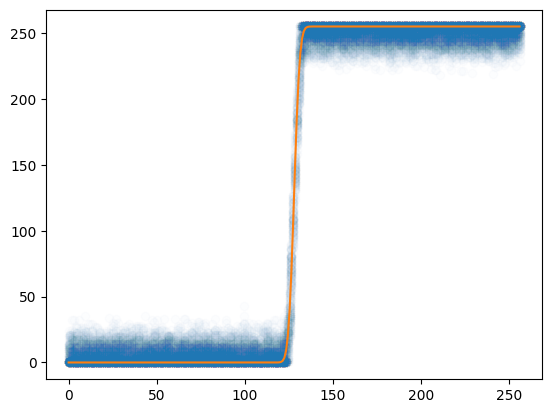

In [19]:
def erf_model(x, sigma, b):
    return 255 * 0.5 * erf((x-b) / (np.sqrt(2)*sigma)) + 255*0.5

calibrator = np.load("calib_images.npz")
calib = calibrator['2_25']

num_lines = 250 - 140
lines = calib[140:250, :]
xs0 = np.linspace(0, calib.shape[0], calib.shape[0])
xs = np.tile(xs0, num_lines)

plt.scatter(xs, lines.ravel(), alpha=0.01)
plt.plot(xs0, erf_model(xs0, 2.51326798, 128), color='C1')
plt.show()